In [23]:
import seaborn as sns 

#データを読み込み
df = sns.load_dataset('iris')
y_col = 'species'
X = df.drop(columns=[y_col])
y = df[y_col]

#データ分割
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#モデル学習
from sklearn. linear_model import LogisticRegression
model = LogisticRegression(penalty='none')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)



In [24]:
#混同行列の作成
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)


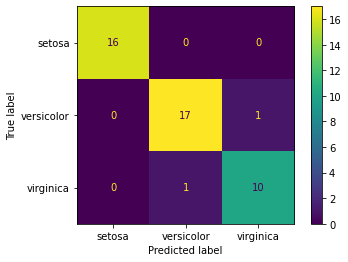

In [25]:
# 混同行列の可視化
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

# Accuracyを計算する

In [27]:
#サンプルデータ
y_true = [1, 1, 0, 1, 0, 0, 1, 1]
y_pred = [1, 1, 1, 0, 0, 1, 0, 1]

from sklearn.metrics import accuracy_score
accuracy_score(y_true, y_pred)

0.5

# Precision

In [28]:
from sklearn.metrics import precision_score
precision_score(y_true, y_pred)

0.6

# Recall 再現率　

In [29]:
from sklearn.metrics import recall_score
recall_score(y_true, y_pred)

0.6

# Specificity 特異度

In [31]:
import numpy as np
np.array(y_true)!=1

array([False, False,  True, False,  True,  True, False, False])

In [33]:
recall_score(np.array(y_true)!=1, np.array(y_pred)!=1)

0.3333333333333333

# 他クラス評価におけるPrecision

In [42]:
#多クラス分類

#データ準備
df = sns.load_dataset('iris')
y_col = 'species'
X = df.loc[:, df.columns!=y_col]
y = df[y_col]

#データ分割
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#model生成　ロジスティック回帰
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='none', multi_class='ovr')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_ovr  = model.predict_proba(X_test)

#評価

#average=Noneの時
print(precision_score(y_test, y_pred, average=None))

#average=macro
print(precision_score(y_test, y_pred, average='macro'))
 
#average=micro
print(precision_score(y_test, y_pred, average='micro'))
   

[1.         0.94444444 0.90909091]
0.9511784511784511
0.9555555555555556


In [37]:
model.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

# Precsion-Recall Curveを描画する

In [46]:
import pandas as pd
df = pd.read_csv('heart_preprocessed.csv')
y_col ='target'
X = df.drop(columns=[y_col])
y = df[y_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
#モデルの構築
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)

Text(0.5, 1.0, 'precision recall curbe')

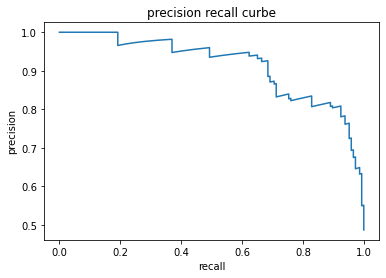

In [55]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba[:, 1])
import matplotlib.pyplot as plt
plt.plot(recall, precision)
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('precision recall curbe')

# F値

In [62]:
from sklearn.metrics import f1_score
y_true = [1, 0, 0, 1, 0, 0, 1, 1]
y_pred = [1, 1, 1, 0, 0, 1, 0, 1]
f1_score(y_true, y_pred)

0.4444444444444445

In [63]:
# 調和平均ver
from scipy.stats import hmean
hmean([recall_score(y_true, y_pred), precision_score(y_true, y_pred)])

0.4444444444444444

In [64]:
print(recall_score(y_true, y_pred))
print(precision_score(y_true, y_pred))

0.5
0.4


# Challenge   閾値に対してのPrecision, Recall, F値の推移を描画する     

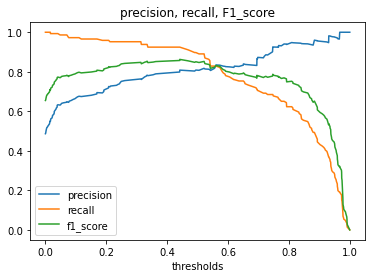

In [104]:
import pandas as pd
df = pd.read_csv('heart_preprocessed.csv')
y_col = 'target'
X = df.drop(columns=[y_col])
y = df[y_col]

#データ分割
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#モデル学習
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
y_predict_proba = model.predict_proba(X_test)

#precision, recall, thresholds, F値
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, y_predict_proba[:, 1])
#thresholdsは最後の１が抜けているので足す
thresholds = np.append(thresholds,1)
#F値を求める
f1_scores = [hmean([pre, reca]) for pre, reca in zip(precision, recall) ]

plt.plot(thresholds, precision)
plt.plot(thresholds, recall)
plt.plot(thresholds, f1_scores)
plt.xlabel('thresholds')
plt.title('precision, recall, F1_score')
plt.legend(['precision', 'recall', 'f1_score'])


In [110]:
#F1スコアが最大にある閾値を探す
thresholds[np.argmax(f1_scores)]

0.44164670248434684

# ROCを描画する

Text(0.5, 1.0, 'ROC_curve')

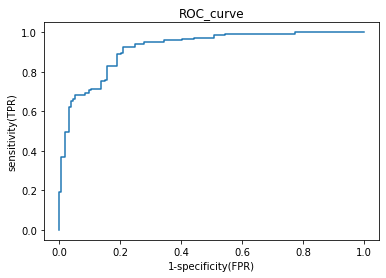

In [117]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])

#描画
plt.plot(fpr, tpr)
plt.xlabel('1-specificity(FPR)')
plt.ylabel('sensitivity(TPR)')
plt.title('ROC_curve')

# ROCカーブをAUCで数値化

In [119]:
from sklearn.metrics import auc
auc(fpr, tpr)

0.919542785981142

# 　他クラス分類のROCを描画する

In [133]:
# データの準備
df = sns.load_dataset('iris')
y_col = 'species'
X = df.drop(columns=[y_col])
y = df[y_col]

#hold-out 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#model構築
model = LogisticRegression()
model.fit(X_train, y_train)

#予測
y_pred_proba = model.predict_proba(X_test)

In [134]:
# macro平均

#まず、y_testをワンホット表現に変換する
from sklearn.preprocessing import label_binarize
y_test_one_hot = label_binarize(y_test, classes=model.classes_)


#
n_classes = 3
fpr = {}
tpr = {}
roc_auc = {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_one_hot[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

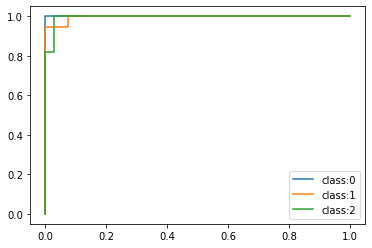

In [135]:
#それぞれのクラスのROC
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'class:{i}')
    plt.legend()

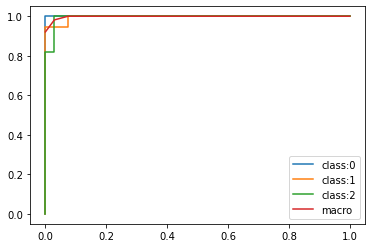

In [143]:
#必要なｘの値のリストを作成
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
# 線形補完 np.interp()
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr = mean_tpr / n_classes

fpr['macro'] = all_fpr
tpr['macro'] = mean_tpr
roc_auc['macro'] = auc(fpr['macro'], tpr['macro'])

#それぞれのクラスとmacroの平均のROC
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'class:{i}')
plt.plot(fpr['macro'], tpr['macro'], label='macro')
plt.legend()

# micro平均  

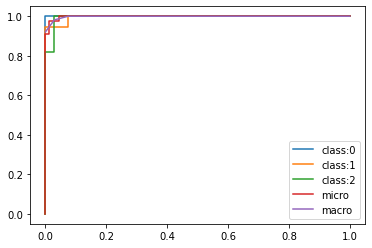

In [145]:
fpr['micro'], tpr['micro'], _ = roc_curve(y_test_one_hot.ravel(),y_pred_proba.ravel())
roc_auc['micro'] = auc(fpr['micro'], tpr['micro'])
#それぞれのクラスとmacroの平均のROC
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'class:{i}')
plt.plot(fpr['micro'], tpr['micro'], label='micro')
plt.plot(fpr['macro'], tpr['macro'], label='macro')
plt.legend()